shape of x train:  (25000, 1000)
shape of x test:  (25000, 1000)
shape of y train:  (25000,)
shape of y test:  (25000,)
Epoch 1/50
250/250 [==============================] - 1s 3ms/step - loss: 1.5264 - accuracy: 0.7390 - val_loss: 0.7854 - val_accuracy: 0.8050
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 0.6828 - accuracy: 0.7948 - val_loss: 0.6447 - val_accuracy: 0.7931
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 0.6205 - accuracy: 0.8141 - val_loss: 0.5980 - val_accuracy: 0.8295
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 0.5905 - accuracy: 0.8222 - val_loss: 0.5834 - val_accuracy: 0.8178
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 0.5673 - accuracy: 0.8282 - val_loss: 0.5530 - val_accuracy: 0.8376
Epoch 6/50
250/250 [==============================] - 1s 4ms/step - loss: 0.5485 - accuracy: 0.8359 - val_loss: 0.5525 - val_accuracy: 0.8284
Epoch 7/50
250/250 [========

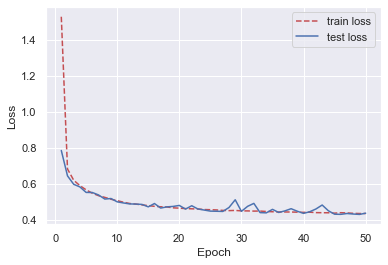

782/782 [==============================] - 1s 766us/step


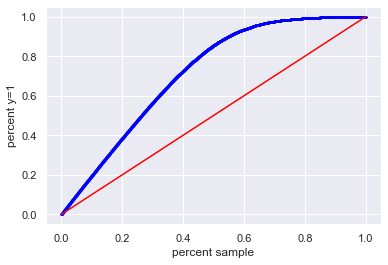

782/782 [==============================] - 1s 749us/step


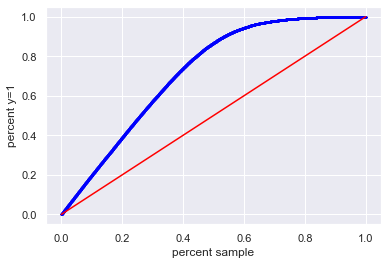

In [1]:
##################################################
## imports

## basic imports
import numpy as np
import pandas as pd
import math
import scipy as sp
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

##keras
from keras import models
from keras import layers
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import regularizers

## lift curve
def mylift(y,p):
   """lift"""
   ii = np.argsort(p)[::-1]
   ps = np.cumsum(y[ii])/np.sum(y)
   return(ps)

##################################################
## data

## Each obseration is a movie review
## y: binary, favorable or not
## x: text of moview review as represented by binary indictors of whether
##      a given term is in the review or not

np.random.seed(0)

#load data
nf=1000 # number of features = number of terms counted in each revies
(xtr,ytr), (xte,yte) = imdb.load_data(num_words=nf)

#create binary features
tkn = Tokenizer(num_words=nf)
Xtr = tkn.sequences_to_matrix(xtr,mode="binary")
Xte = tkn.sequences_to_matrix(xte,mode="binary")

## quick look at data
print("shape of x train: ",Xtr.shape)
print("shape of x test: ",Xte.shape)
print("shape of y train: ",ytr.shape)
print("shape of y test: ",yte.shape)
ntr = len(ytr)
nte = len(yte)

#distribution of ytr
pd.Series(ytr).value_counts()/ntr
#distribution of yte
pd.Series(yte).value_counts()/ntr

#X is all 0's and 1's
Xtr[0:20,0:5]
pd.Series(Xtr[:,4]).value_counts()
pd.Series(Xtr.reshape((nf*ntr,))).value_counts()

## since all the x's are binary, we do not have to standardise !!!

##################################################
### fit neural net model

## make model in keras, two hidden layers, each with 16 units, relu activation.
## final output layer is sigmoid to get a logit like fit.
#nn
l2p=.1 #L2 penalty
nmod = models.Sequential()
nmod.add(layers.Dense(units=16,activation="relu",kernel_regularizer=regularizers.l2(l2p),input_shape=(nf,)))
nmod.add(layers.Dense(units=16,activation="relu",kernel_regularizer=regularizers.l2(l2p)))
nmod.add(layers.Dense(units=1,activation="sigmoid"))

#compile
# binary_crossentropy is similar to deviance loss, will also keep track of acc=%correct
nmod.compile(loss="binary_crossentropy",optimizer="rmsprop",metrics=["accuracy"])

#fit
nhist = nmod.fit(Xtr,ytr,epochs=50,verbose=1,batch_size=100,validation_data=(Xte,yte))

##################################################
#plot loss versus epoch number
trL = nhist.history["loss"]
teL = nhist.history["val_loss"]

epind = range(1,len(teL)+1)
plt.plot(epind,trL,"r--")
plt.plot(epind,teL,"b-")
plt.legend(["train loss","test loss"])
plt.xlabel("Epoch"); plt.ylabel("Loss")
plt.show()

#lift on test
phatte = nmod.predict(Xte)[:,0]
nte = len(yte)
pvec = np.linspace(1,nte,nte)/nte
plt.scatter(pvec,mylift(yte,phatte),s=.5,c='blue')
plt.xlabel('percent sample'); plt.ylabel('percent y=1')
plt.plot(pvec,pvec,c='red')
plt.show()

#lift on train
phattr = nmod.predict(Xtr)[:,0]
ntr = len(ytr)
pvec = np.linspace(1,ntr,ntr)/ntr
plt.scatter(pvec,mylift(ytr,phattr),s=.5,c='blue')
plt.xlabel('percent sample'); plt.ylabel('percent y=1')
plt.plot(pvec,pvec,c='red')
plt.show()





